In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("datasets//Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

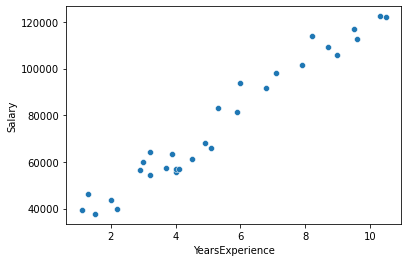

In [5]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

In [6]:
X=df['YearsExperience'].to_list()
Y=df['Salary'].to_list()

In [7]:
print(type(X))
print(type(Y))

<class 'list'>
<class 'list'>


In [8]:
def hypotesis(a, b, X):
    res=X.copy()
    for i in range(len(X)):
        res[i]=(a*X[i])+b
    return res

def error(Y, Y_p):
    errors=Y.copy()
    for i in range(len(Y)):
        errors[i]=Y[i]-Y_p[i]
        
    return errors

def se(Y, Y_p):
    errors=error(Y, Y_p)
    for i in range(len(errors)):
        errors[i]=errors[i]**2
    return errors

def derivative(X, Y, Y_p, a=True):
    errors=error(Y, Y_p)
    if a==True:
        for i in range(len(X)):
            errors[i]=(-X[i])*errors[i]
            
        return (2/len(Y))*(sum(errors))
    
    return (-2/len(Y))*sum(errors)
    

def gradient_descent(X, Y, a=0, b=0, epochs=100000, l_r=0.01):
    n=len(Y)
    for i in range(epochs):
        
        Y_p=hypotesis(a, b, X)
        
        rmse=(1/n)*sum(se(Y, Y_p))
       
        a=a-(l_r*derivative(X, Y, Y_p))
        
        b=b- (l_r*(derivative(X, Y, Y_p, a=False)))
    return a, b

In [9]:
gradient_descent(X, Y)

(9449.962321455143, 25792.20019866825)

In [10]:
a, b=gradient_descent(X, Y)

In [11]:
Y_pred=a*df['YearsExperience']+b

In [12]:
MSE=sum((df['Salary']-Y_pred)**2)/len(Y_pred)

In [13]:
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 31270951.72228094


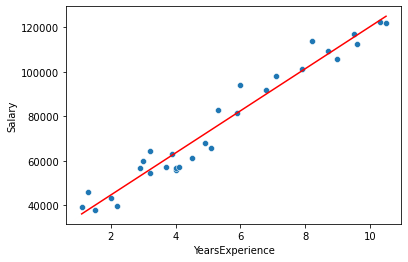

In [14]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.plot(df['YearsExperience'], Y_pred, color="red")

In [15]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
lr=LinearRegression()

In [17]:
lr.fit(df[['YearsExperience']], df[['Salary']])

LinearRegression()

In [18]:
print(lr.coef_)
print(lr.intercept_)

[[9449.96232146]]
[25792.20019867]


In [19]:
MSE_sk=mean_squared_error(Y,lr.predict(df[['YearsExperience']]))
print(f'Mean Squared Error with sklearn: {MSE_sk}')

Mean Squared Error with sklearn: 31270951.722280968


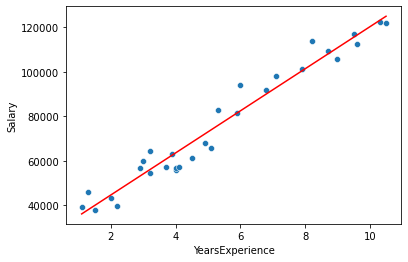

In [20]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.plot(df['YearsExperience'], lr.predict(df[['YearsExperience']]), color="red")
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

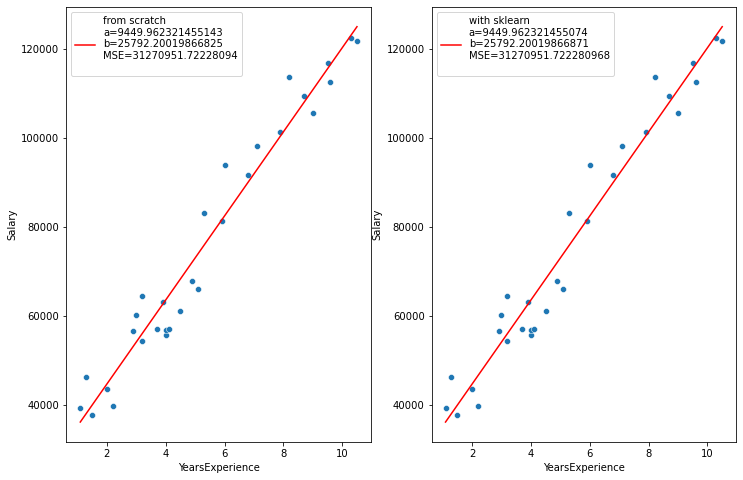

In [21]:
fig, axes=plt.subplots(figsize=(12, 8), ncols=2, nrows=1)
sns.scatterplot(x='YearsExperience', y='Salary', data=df, ax=axes[0])
sns.lineplot(df['YearsExperience'], Y_pred, color="red", ax=axes[0],
label=f"""from scratch
a={a}
b={b}
MSE={MSE}
""")

sns.scatterplot(x='YearsExperience', y='Salary', data=df, ax=axes[1])
sns.lineplot(df['YearsExperience'], lr.predict(df[['YearsExperience']])[:, 0], color="red", ax=axes[1],
label=f"""with sklearn
a={lr.coef_[0][0]}
b={lr.intercept_[0]}
MSE={MSE_sk}
""")